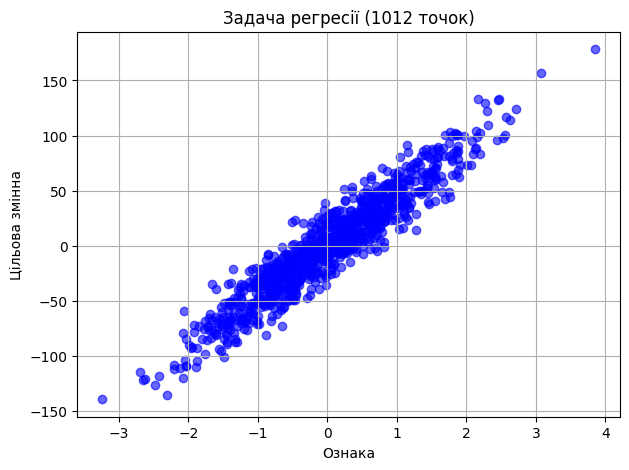

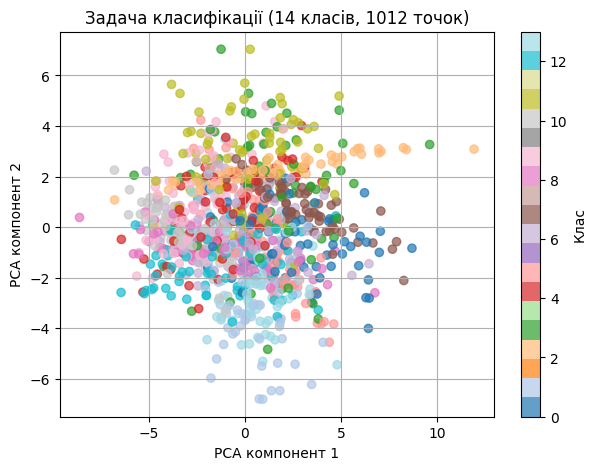

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.decomposition import PCA
import pandas as pd

# === 1. Задача регресії ===
X_reg, y_reg = make_regression(n_samples=1012, n_features=1, noise=15, random_state=42)

# Візуалізація регресії
plt.figure(figsize=(7, 5))
plt.scatter(X_reg, y_reg, color='blue', alpha=0.6)
plt.title("Задача регресії (1012 точок)")
plt.xlabel("Ознака")
plt.ylabel("Цільова змінна")
plt.grid(True)
plt.show()


# === 2. Задача класифікації ===
X_clf, y_clf = make_classification(
    n_samples=1012,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=14,
    n_clusters_per_class=1,
    random_state=42
)

# Зменшення розмірності для візуалізації (PCA до 2D)
X_clf_2d = PCA(n_components=2).fit_transform(X_clf)

# Візуалізація класифікації
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_clf_2d[:, 0], X_clf_2d[:, 1], c=y_clf, cmap='tab20', alpha=0.7)
plt.title("Задача класифікації (14 класів, 1012 точок)")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.colorbar(scatter, label='Клас')
plt.grid(True)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 # Регресія
 # Створення даних для регресії
X_reg, y_reg = make_regression(n_samples=1012, n_features=1, noise=15, random_state=42)

# Стандартизація
scaler_reg = StandardScaler()
X_reg = scaler_reg.fit_transform(X_reg)

# Розбиття на тренувальні та тестові дані
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Побудова моделі
model_reg = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_reg.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse')

# Навчання
history_reg = model_reg.fit(X_reg_train, y_reg_train, epochs=50, validation_split=0.2, verbose=0)

# Оцінка
y_reg_pred = model_reg.predict(X_reg_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"📉 Mean Squared Error (регресія): {mse:.2f}")






7/7 [==============================] - 0s 4ms/step
📉 Mean Squared Error (регресія): 221.05



7/7 [==============================] - 0s 3ms/step
✅ Accuracy (класифікація): 0.42


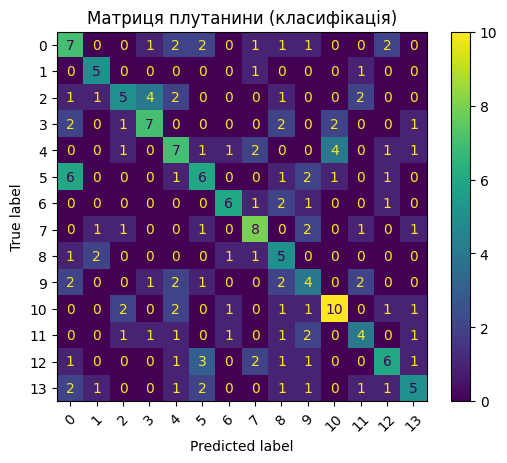

In [3]:

 # Класифікація
# Створення даних
X_clf, y_clf = make_classification(
    n_samples=1012,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=14,
    random_state=42
)

# Стандартизація
scaler_clf = StandardScaler()
X_clf = scaler_clf.fit_transform(X_clf)

# Розбиття
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# One-hot encoding для y
y_clf_train_cat = keras.utils.to_categorical(y_clf_train, num_classes=14)
y_clf_test_cat = keras.utils.to_categorical(y_clf_test, num_classes=14)

# Побудова моделі
model_clf = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_clf.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(14, activation='softmax')
])

model_clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання
history_clf = model_clf.fit(X_clf_train, y_clf_train_cat, epochs=50, validation_split=0.2, verbose=0)

# Прогноз
y_clf_pred_prob = model_clf.predict(X_clf_test)
y_clf_pred = np.argmax(y_clf_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_clf_test, y_clf_pred)
print(f"✅ Accuracy (класифікація): {accuracy:.2f}")

# Матриця плутанини
cm = confusion_matrix(y_clf_test, y_clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Матриця плутанини (класифікація)")
plt.show()